# ALX Udacity Data Analyst Course

This notebook is for the above named course, this is the 2nd project in the program,        
In this project I'll perform data wrangling on a dataset from a twitter profile.
<br>  
The Notebook has the following sections
> 1. [Data Gathering](#1-data-gathering)
> 2. [Data Assessment](#2-data-assessment)
> 3. [Data Cleaning](#3-data-cleaning)
> 4. [Storing Data](#4-storing-the-data)
> 5. [Insight Gathering & Visualisation](#4-insight-gathering--visualisation)

## 1. Data Gathering

In [1]:
# This cell is for initialising the necessary libraries before I begin coding,
import pandas as pd
import numpy as np
import json
import os
import requests as rq
import tweepy as twp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Connecting the twitter API
# For some reason the wait on rate limit notify didn't work for me, I had to comment it out for the code to run
auth = twp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = twp.API(auth, 
                 parser = twp.parsers.JSONParser(), 
                 wait_on_rate_limit = True)
                 #wait_on_rate_limit_notify = True#)

In [4]:
#  Uploading the twitter_archive to a dataframe to df1
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
#  Checking the attritubes of the first dataframe with the .info() method
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
#  Downloading the images programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [7]:
#  Writing the file contents to a dataframe df2
df2 = pd.read_csv("image-predictions.tsv", sep = '\t')

In [8]:
#  We then check the contents of the second dataframe
df2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [9]:
# Next, we need use the tweet IDs from the twitter csv to query twitter for likes & retweets
# In the event that we cannot find all the tweets we will create two separate lists
# one to hold the details of found tweets, the other to hold the details of tweets where the IDs aren't found
tweets_exist = []
tweets_missing = []

# Then we run a loop to pull requests from the twitter API via Tweepy
for tweet_id in df1['tweet_id']:   
    try:
        tweets_exist.append(api.get_status(tweet_id))
    except Exception as e:
        tweets_missing.append(tweet_id)

Rate limit reached. Sleeping for: 699
Rate limit reached. Sleeping for: 707


In [10]:
# Now we'll print the tweets we've been able to match and those we haven't been able to find
print(f'found tweets = {len(tweets_exist)} tweets, \n missing tweets = {len(tweets_missing)} tweets')

found tweets = 2327 tweets, 
 missing tweets = 29 tweets


In [11]:
# In this code block, we will fristly create a blank dictionary (due to the JSON format) to house the results of the query run earlier
# Then we append the objects in the tweet_exists variable
tweet_dictionary = []
for tweet in tweets_exist:
    tweet_dictionary.append(tweet)

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(tweet_dictionary, indent=4))

In [12]:
# Here, what we're trying to achieve is the isolation of key pieces of info within the .txt file
# Once that's done, we then write that information to a dataframe.

tweet_dictionary_2 = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    txt_file = json.load(json_file)
    for tweet_info in txt_file:
        tweet_id = tweet_info['id']
        tweet_text = tweet_info['text']
        favorite_count = tweet_info['favorite_count']
        retweet_count = tweet_info['retweet_count']


        tweet_dictionary_2.append({'tweet_id': str(tweet_id),# We need to decalre the variables whiel appending to force the data type
                             'tweet_text': str(tweet_text),# We need to decalre the variables whiel appending to force the data type
                             'favorite_count': int(favorite_count),# We need to decalre the variables whiel appending to force the data type
                             'retweet_count': int(retweet_count),# We need to decalre the variables whiel appending to force the data type
                            })
        df3 = pd.DataFrame(tweet_dictionary_2, columns = ['tweet_id', 'tweet_text','favorite_count', 'retweet_count'])

In [13]:
df3.head(2)

,tweet_id,tweet_text,favorite_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,33629,6961
1,892177421306343426,This is Tilly. She's just checking pup on you....,29179,5265


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   tweet_text      2327 non-null   object
 2   favorite_count  2327 non-null   int64 
 3   retweet_count   2327 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 72.8+ KB


## 2. Data Assessment

In [15]:
# We begin by analysing the dataframe with the .info() method
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
df1.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [17]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
sum(df2.jpg_url.duplicated())

66

In [19]:
df1.sort_values('rating_numerator',ascending=False).head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [20]:
df1.sort_values('rating_denominator',ascending=False).head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None


## 3. Data Cleaning

### Data Issues
While going through the files progammatically and visually, I've identified the following issues with the data  

1. [Quality Issues](#a-quality-issues)
    * [The tweet_id column should be converted to text in df1](#define-issue-1)
    * [The tweet_id column should be converted to text in df2](#define-issue-2)
    * [The 'name' column in df1 has some irregular entries for example; 55 entries of 'a'](#define-issue-3)
    * [jpg_url has 66 duplicated entries in df2](#define-issue-4)
    * [rating_numerator has unusually high values in df1  e.g. 1776](#define-issue-5)
    * [rating_denominator also has unusually high values e.g. 170](#define-issue-6)
    * [dog_breed is camel-cased in df2](#define-issue-7)
    * [in_reply_to_status_id has duplicated records](#define-issue-8)
    
2. [Tidiness Issues](#b-tidiness-issues)
    * [doggo, floofer, pupper etc should be categorical and can be consolidated in one column in df1](#define-issue-9)
    * [timestamp can be split into month day year for better analysis](#define-issue-10)

### A. Quality Issues

- #### Define: Issue 1       
    - Problem: tweet_id column in df1 is int64, it should be string
    - Solution: convert the 'tweet_id' column in df1 to string

In [21]:
# create a copy of the dataframe
df1_clean = df1.copy()

- Code

In [22]:
# Converting that column to 'str' datatype
df1_clean.tweet_id = df1_clean.tweet_id.astype(str)

- Test

In [23]:
df1_clean.tweet_id.info()
# as you can see from the output of this cell, the datatype has been changed from int64 → object

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2356 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


- #### Define: Issue 2      
    - Problem: tweet_id column in df2 is int64, it should be string
    - Solution: convert the 'tweet_id' column in df1 to string

In [24]:
# create a copy of the dataframe
df2_clean = df2.copy()

- Code

In [25]:
# Converting that column to 'str' datatype
df2_clean.tweet_id = df2_clean.tweet_id.astype(str)

- Test

In [26]:
df2_clean.tweet_id.info()
# as you can see from the output of this cell, the datatype has been changed from int64 → object

<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


- #### Define: Issue 3       
    - Problem: The 'name' column in df1 has some irregular entries for example; 55 entries of 'a' and all of them are lowercase
    - Solution: check the number of values with these irregular names, if they are relatively small, remove them from the dataframe

- Code

In [27]:
# creating an empty list for the irregular names
irregular_names = []
# running a loop through the names column to catch the irregular names
# they seem to start with lower case
for i in df1_clean['name']:
    if i.islower():
        irregular_names.append(i)

# print the list
irregular_names

['such',
 'a',
 'quite',
 'quite',
 'quite',
 'not',
 'one',
 'incredibly',
 'a',
 'mad',
 'an',
 'very',
 'a',
 'very',
 'just',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very',
 'actually',
 'a',
 'just',
 'getting',
 'mad',
 'very',
 'this',
 'unacceptable',
 'all',
 'a',
 'old',
 'a',
 'infuriating',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'very',
 'getting',
 'just',
 'a',
 'the',
 'the',
 'actually',
 'by',
 'a',
 'officially',
 'a',
 'the',
 'the',
 'a',
 'a',
 'a',
 'a',
 'life',
 'a',
 'one',
 'a',
 'a',
 'a',
 'light',
 'just',
 'space',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'quite',
 'a',
 'an',
 'a',
 'an',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a']

In [28]:
# replace the irregular names with a unique identifier and drop from the data frame
for i in irregular_names:
    df1_clean.name.replace(i, "None", inplace = True)

In [29]:
# Removing the names marked as "None"
# Referenced from this stackoverflow article ↓
# https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
df1_clean = df1_clean[df1_clean.name != "None"]

- Test

In [30]:
df1_clean.query('name == "None"').head(5)
# as you can see from the output of this cell, the rows with "None" are gone

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


- #### Define: Issue 4       
    - Problem: jpg_url has 66 duplicated entries in df2
    - Solution: Remove the duplicated rows from the dataset

- Code

In [31]:
# using the drop duplicates method, I needed to specify inplace here for the chnages to be permamnent
df2_clean.drop_duplicates(subset=['jpg_url'],inplace=True)

- Test

In [32]:
# Test to see if there are still duplicates within the jpg_url column, and from the result, the duplicates are done
sum(df2_clean.jpg_url.duplicated())

0

- #### Define: Issue 5       
    - Problem: rating_numerator has unusually high values in df1  e.g. 1776
    - Solution: check the number of values that have these outliers, if the number is inconsequential, drop them from the dataframe

In [33]:
# We run this code to get the number of entries with numerators greater than 10
# There ate just 6 entries that are irregular, we will go ahead and drop these
df1_clean.query('rating_numerator > 10').rating_numerator.value_counts()

12      382
11      344
13      204
14       21
75        2
24        1
27        1
1776      1
50        1
Name: rating_numerator, dtype: int64

- Code

In [34]:
df1_clean = df1_clean[df1_clean.rating_numerator <= 14]

In [35]:
# We then run the test again to see if it works
df1_clean.query('rating_numerator > 10').rating_numerator.value_counts()
# from the output of this cell, we can see that the code has worked

12    382
11    344
13    204
14     21
Name: rating_numerator, dtype: int64

- #### Define: Issue 6       
    - Problem: rating_denominator also has unusually high values e.g. 170
    - Solution: check the number of values that have these outliers, if the number is inconsequential, drop them from the dataframe

- Code

In [36]:
# We first check the number of values that have outliers
df1_clean.query('rating_denominator > 10').rating_denominator.value_counts()

11    1
Name: rating_denominator, dtype: int64

In [37]:
df1_clean = df1_clean[df1_clean.rating_denominator != 11]

- Test

In [38]:
df1_clean.query('rating_denominator > 10').rating_denominator.value_counts()
# from the output of this cell, we can see that the code has worked

Series([], Name: rating_denominator, dtype: int64)

- #### Define: Issue 7       
    - Problem: dog_breed is camel-cased in df2
    - Solution: use the .lower() function to set all dog breeds to lowercase

- Code

In [39]:
# checking to see the dog breeds
df2_clean.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


In [40]:
# using the apply method to set the values to lowercase
df2_clean = df2_clean.apply(lambda x: x.astype(str).str.lower()) 

- Test

In [41]:
# as shown in the output below, all the items have been set to lowercase for p1, p2, & p3
df2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/ct4udn0wwaa0amy.jpg,1,welsh_springer_spaniel,0.465074,true,collie,0.156665,true,shetland_sheepdog,0.0614285,true
1,666029285002620928,https://pbs.twimg.com/media/ct42grguyaa5ido.jpg,1,redbone,0.506826,true,miniature_pinscher,0.0741916999999999,true,rhodesian_ridgeback,0.07201,true
2,666033412701032449,https://pbs.twimg.com/media/ct4521twwaevmyu.jpg,1,german_shepherd,0.596461,true,malinois,0.1385839999999999,true,bloodhound,0.116197,true
3,666044226329800704,https://pbs.twimg.com/media/ct5dr8hueaa-leu.jpg,1,rhodesian_ridgeback,0.408143,true,redbone,0.360687,true,miniature_pinscher,0.222752,true
4,666049248165822465,https://pbs.twimg.com/media/ct5iqmsxiaaky4a.jpg,1,miniature_pinscher,0.560311,true,rottweiler,0.243682,true,doberman,0.154629,true


- #### Define: Issue 8       
    - Problem: in_reply_to_status_id duplicated some of the tweet_ids
    - Solution: remove the row with an entry in the in_reply_to_status_id column

- Code

In [42]:
# To get the index of the row with the value, we use the .query function
df1_clean.query('in_reply_to_status_id > 1')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None


In [43]:
df1_clean.drop(2169, axis=0, inplace=True)

- Test

In [44]:
# After running th cell below, you can see that the row has been removed from the data set
df1_clean.query('in_reply_to_status_id > 1')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### B. Tidiness Issues

- #### Define: Issue 9       
    - Problem: doggo, floofer, pupper etc should be categorical and can be consolidated in one column in df1
    - Solution: Consolidate the values into a single column and add them to the dataframe
    - I made use of Anderson Uyekita's technique here →
        https://github.com/AndersonUyekita/ND111_data_science_foundations_02/blob/master/03-Chapter03/00-Project_02/wrangle_act.ipynb

- Code

In [45]:
# Here we will define a variable to hold the columns we're interested in
# We then substitute the 'None' values with blank placeholders
# And findally add them to a new np array
categorical = df1_clean[['doggo','floofer','pupper','puppo']]
categorical = categorical.replace('None','')
new_cols = np.array(categorical['doggo']) + np.array(categorical['floofer']) +np.array(categorical['pupper']) + np.array(categorical['puppo'])

In [46]:
pd.DataFrame(new_cols, columns = ['new_cols']).new_cols.value_counts()

               1291
pupper          129
doggo            45
puppo            20
floofer           5
doggopupper       4
Name: new_cols, dtype: int64

In [47]:
df1_clean.reset_index(drop=True, inplace=True)
df1_clean= pd.concat([df1_clean, pd.DataFrame(new_cols, columns = ['dogtionary'])], axis = 1)

In [48]:
# We have to make sure we drop the current columns
df1_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

- Test

In [49]:
# Once we print the values of the code below, we see that we have one column
df1_clean.dogtionary.value_counts()

               1291
pupper          129
doggo            45
puppo            20
floofer           5
doggopupper       4
Name: dogtionary, dtype: int64

- #### Define: Issue 10      
    - Problem: timestamp can be split into month day year for better analysis
    - Solution: split the timestamp column into into its individual columns

- Code

In [50]:
# convert timestamp to datetime
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

#extract year, month and day to new columns
df1_clean['year'] = df1_clean['timestamp'].dt.year
df1_clean['month'] = df1_clean['timestamp'].dt.month
df1_clean['day'] = df1_clean['timestamp'].dt.day

#Finally drop timestamp column
df1_clean = df1_clean.drop('timestamp', 1)

C:\Users\MSI GP63\AppData\Local\Temp\ipykernel_25508\896481250.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1_clean = df1_clean.drop('timestamp', 1)


- Test

In [51]:
# The output below shows the new columns for year, month & day
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,year,month,day
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,2017,8,1
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,2017,8,1
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,2017,7,31
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,2017,7,30
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,2017,7,29


## 4. Storing the Data

In [52]:
df1_clean.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## 5. Insight Gathering & Visualisation

#### Insight 1:  
The top 5 most popular names are;

In [53]:
df1_clean.name.value_counts().head(5)

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Penny      10
Name: name, dtype: int64

Bar Graph

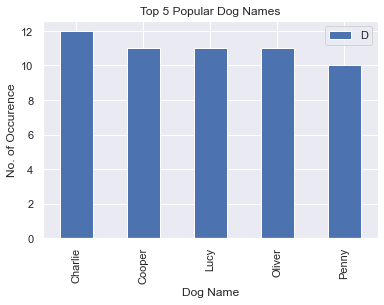

In [54]:
df1_clean.name.value_counts().head(5).plot.bar();
plt.title('Top 5 Popular Dog Names')
plt.legend('Dog Names')
plt.xlabel('Dog Name')
plt.ylabel('No. of Occurence')
plt.show()

#### Insight 2:  
Doggoes are rated higher than any class in the dogtionary;

In [55]:
df1_clean.groupby(['dogtionary'])['rating_numerator'].mean()

dogtionary
               10.776143
doggo          12.022222
doggopupper    11.750000
floofer        11.600000
pupper         10.364341
puppo          11.900000
Name: rating_numerator, dtype: float64

#### Insight 3:  
Most of the dogs are classified as Puppers

In [56]:
df1_clean.dogtionary.value_counts().sort_values(ascending=False).head(5)

           1291
pupper      129
doggo        45
puppo        20
floofer       5
Name: dogtionary, dtype: int64